In [1]:
!pip install matplotlib upsetplot

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for upsetplot: filename=UpSetPlot-0.9.0-py3-none-any.whl size=24813 sha256=fcbd902a02932594e9a74cd8e70d0f52866708598b902912b35fb437f7d49526
  Stored in directory: /root/.cache/pip/wheels/73/42/9f/1c9718ea27f30466d2787e0f7d88a7cb11942e3460c17e0ef6
Successfully built upsetplot


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet
from upsetplot import plot

In [3]:
domain_df = pd.read_csv('upset_data.txt', delimiter='\t')
display(domain_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Method          1028 non-null   object
 1   NB-ARC          1028 non-null   int64 
 2   Rx_N            1028 non-null   int64 
 3   NB-LRR          1028 non-null   int64 
 4   LRR_1           1028 non-null   int64 
 5   LRR_4           1028 non-null   int64 
 6   LRR_8           1028 non-null   int64 
 7   CC              1028 non-null   int64 
 8   TIR             1028 non-null   int64 
 9   C-JID           1028 non-null   int64 
 10  RRM_1           1028 non-null   int64 
 11  MULE            1028 non-null   int64 
 12  SIS             1028 non-null   int64 
 13  HgmA_N          1028 non-null   int64 
 14  PMD             1028 non-null   int64 
 15  rve             1028 non-null   int64 
 16  Clp_N           1028 non-null   int64 
 17  RPW8            1028 non-null   int64 
 18  ubiquiti

None

In [4]:
domain_df.iloc[:, 1:] = domain_df.iloc[:, 1:].astype(bool)

display(domain_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Method          1028 non-null   object
 1   NB-ARC          1028 non-null   bool  
 2   Rx_N            1028 non-null   bool  
 3   NB-LRR          1028 non-null   bool  
 4   LRR_1           1028 non-null   bool  
 5   LRR_4           1028 non-null   bool  
 6   LRR_8           1028 non-null   bool  
 7   CC              1028 non-null   bool  
 8   TIR             1028 non-null   bool  
 9   C-JID           1028 non-null   bool  
 10  RRM_1           1028 non-null   bool  
 11  MULE            1028 non-null   bool  
 12  SIS             1028 non-null   bool  
 13  HgmA_N          1028 non-null   bool  
 14  PMD             1028 non-null   bool  
 15  rve             1028 non-null   bool  
 16  Clp_N           1028 non-null   bool  
 17  RPW8            1028 non-null   bool  
 18  ubiquiti

None

In [9]:
# Setting Okabe&Ito colors
colors = {
    'black': '#000000',
    'orange': '#E69F00',
    'sky blue': '#56B4E9',
    'bluish green': '#009E73',
    'yellow': '#F0E442',
    'blue': '#0072B2',
    'vermilion': '#D55E00',
    'reddish purple': '#CC79A7'}

# Select three colors
selected_colors = [colors['reddish purple'], colors['yellow']]

# Barras empilhadas

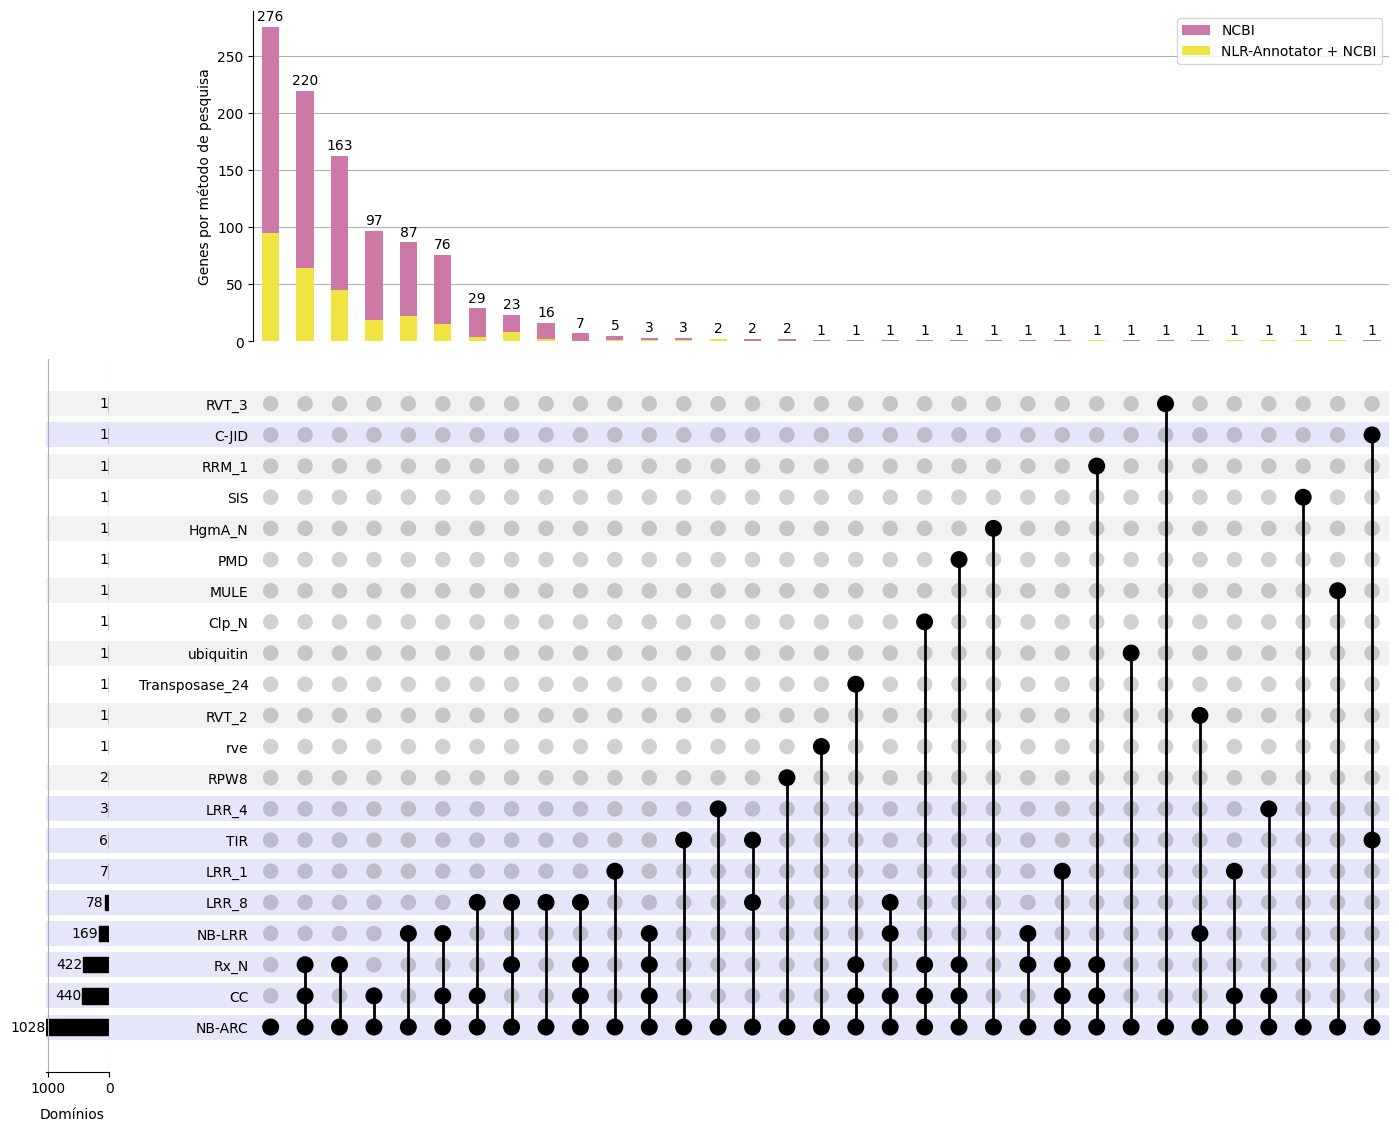

In [15]:
import pandas as pd
from upsetplot import UpSet
from matplotlib import pyplot as plt

# Set index based on all columns except the first one
df = domain_df.set_index(domain_df.columns[1:].tolist())

# Disable the default bar chart
upset = UpSet(df, intersection_plot_elements=0, sort_by='cardinality', show_counts=True)

# Lines to highlight
nlr_domains = ['NB-ARC', 'Rx_N', 'NB-LRR', 'CC', 'TIR', 'LRR_1', 'LRR_4', 'LRR_8', 'C-JID']

# Add stacked bar chart by method
upset.add_stacked_bars(by='Method', colors=selected_colors, title='Genes por método de pesquisa', elements=10)
upset.style_categories(nlr_domains, shading_facecolor='lavender')
upset.plot()

# Add a title to the category part of the plot
plt.text(-0.16, -2.35, 'Domínios', fontsize=10, ha='center', transform=plt.gca().transAxes)

plt.show()

# Barras Simples


In [16]:
# Sorting the data
nlrannotator_filtered_df = domain_df[domain_df['Method'] == 'NLR-Annotator']
ncbi_filtered_df = domain_df[domain_df['Method'] == 'NCBI']
both_filtered_df = domain_df[domain_df['Method'] == 'NLR-Annotator + NCBI']

# Lines to highlight
nlr_domains = ['NB-ARC', 'Rx_N', 'NB-LRR', 'CC', 'TIR', 'LRR_1', 'LRR_4', 'LRR_8', 'C-JID']

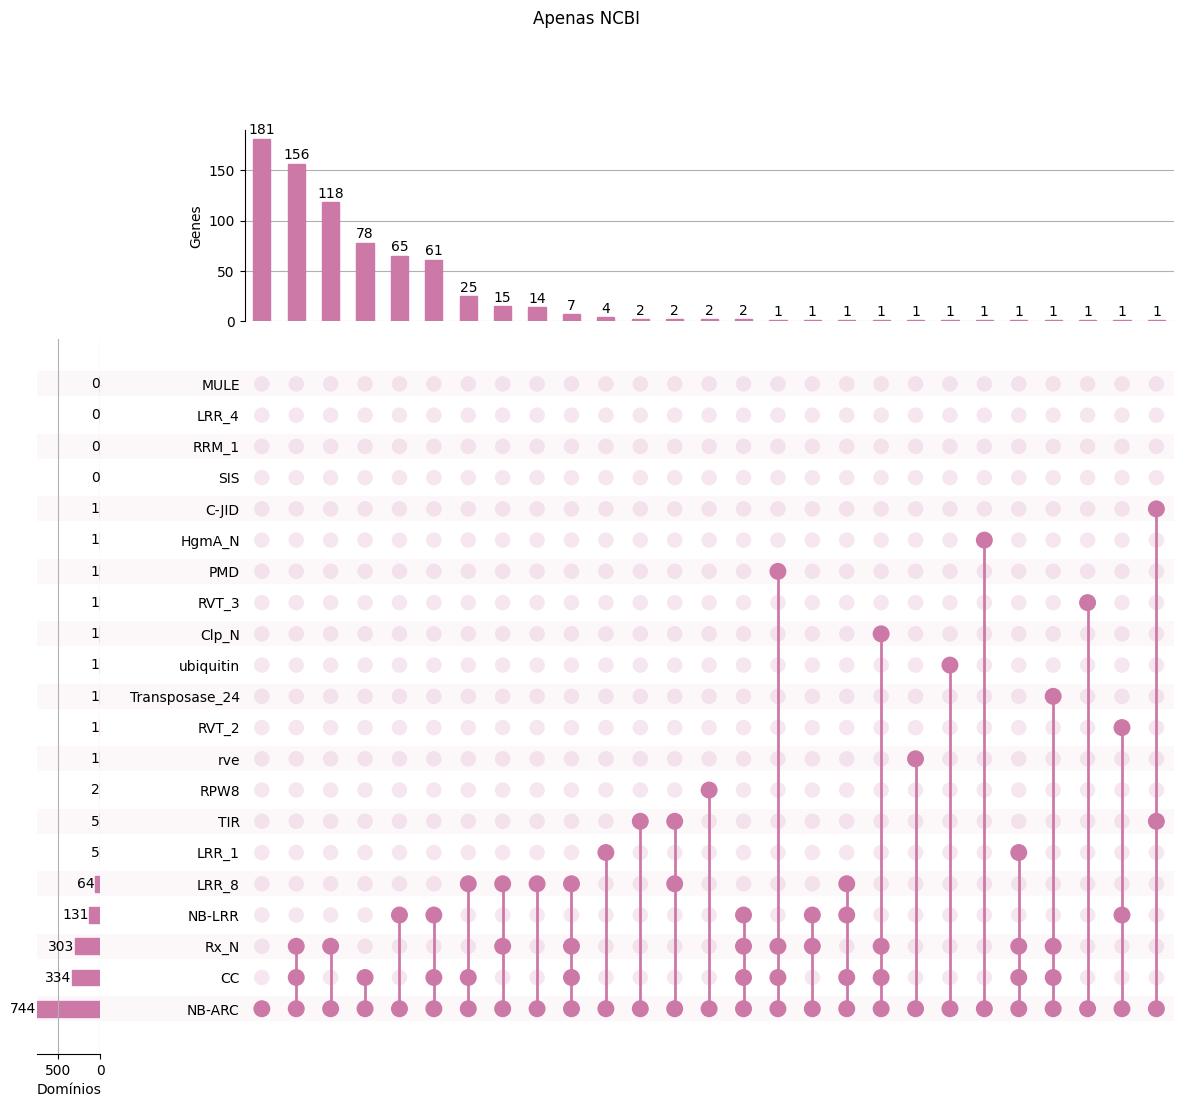

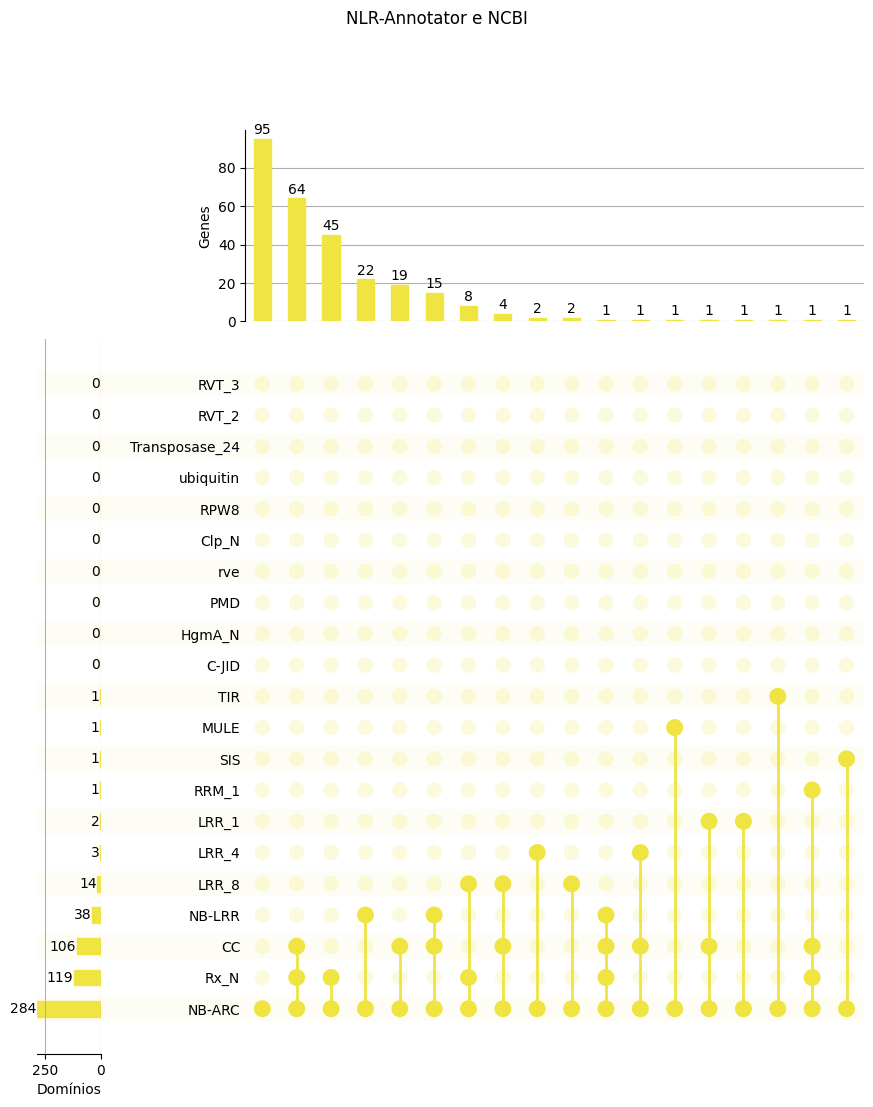

In [17]:
# Set the index
#df1 = nlrannotator_filtered_df.set_index(nlrannotator_filtered_df.columns[1:].tolist())
df2 = ncbi_filtered_df.set_index(ncbi_filtered_df.columns[1:].tolist())
df3 = both_filtered_df.set_index(both_filtered_df.columns[1:].tolist())

# Create UpSet subplot
#plot_result = plot(df1, sort_by='cardinality', show_counts='{:,}', facecolor=colors['sky blue'])
#plt.suptitle('Apenas NLR-Annotator')
#plot_result['intersections'].set_ylabel('Genes')
#plot_result['totals'].set_xlabel('Domínios')
#plt.show()

plot_result = plot(df2, sort_by='cardinality', show_counts='{:,}', facecolor=colors['reddish purple'])
plt.suptitle('Apenas NCBI')
plot_result['intersections'].set_ylabel('Genes')
plot_result['totals'].set_xlabel('Domínios')
plt.show()

plot_result = plot(df3, sort_by='cardinality', show_counts='{:,}', facecolor=colors['yellow'])
plt.suptitle('NLR-Annotator e NCBI')
plot_result['intersections'].set_ylabel('Genes')
plot_result['totals'].set_xlabel('Domínios')
plt.show()